In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import datetime

In [2]:
df=pd.read_csv('brooklyn99_episodes.csv')

In [3]:
df.head()

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,prod_code,us_viewers
0,1,1,1,Pilot,Phil Lord & Christopher Miller,Dan Goor & Michael Schur,2013-09-17,101.0,6170000.0
1,1,2,2,The Tagger,Craig Zisk,Norm Hiscock,2013-09-24,102.0,4030000.0
2,1,3,3,The Slump,Julie Anne Robinson,Prentice Penny,2013-10-01,105.0,3430000.0
3,1,4,4,M.E. Time,Troy Miller,Gil Ozeri,2013-10-08,106.0,3340000.0
4,1,5,5,The Vulture,Jason Ensler,Laura McCreary,2013-10-15,104.0,3430000.0


In [4]:
df[['directed_by','us_viewers']].groupby(['directed_by']).sum().reset_index().sort_values(['us_viewers'],ascending = False).head(1)

,directed_by,us_viewers
38,Michael McDonald,30400000.0


In [5]:
df[df['directed_by']=='Michael McDonald']['us_viewers'].sum()

30400000.0

In [41]:
temp_df = pd.DataFrame(df['directed_by'].value_counts().head().reset_index().rename(columns={'index':'Director','directed_by':'No. of Episodes directed'}))

Text(0, 0.5, 'Number of Epoisodes')

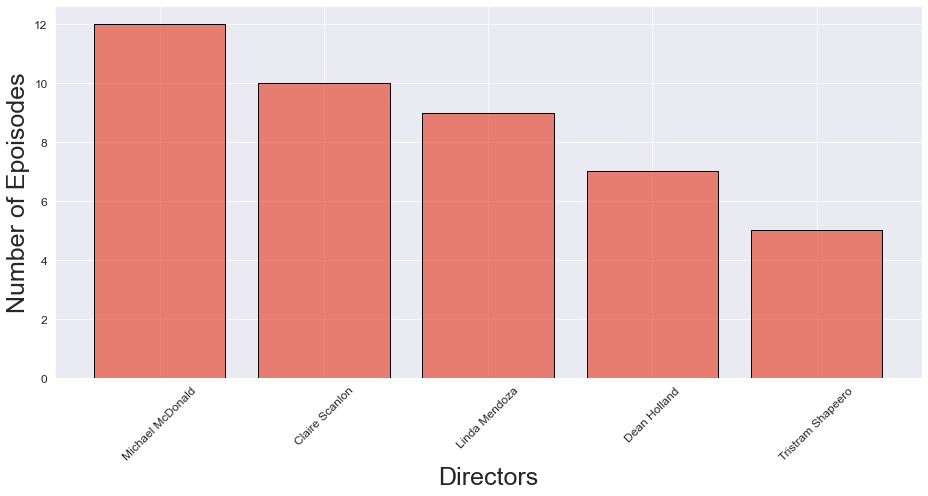

In [92]:
plt.rcParams["figure.figsize"] = [13, 7]
plt.rcParams["figure.autolayout"] = True
plt.bar(temp_df['Director'],temp_df['No. of Episodes directed'],align='center',color=(0.9, 0.2, 0.1, 0.6),edgecolor='k')
plt.xticks(rotation=45,size=12)
plt.xlabel('Directors',size=25)
plt.yticks(size=12)
plt.ylabel('Number of Epoisodes',size=25)

In [32]:
df['directed_by'].value_counts().head()

Michael McDonald     12
Claire Scanlon       10
Linda Mendoza         9
Dean Holland          7
Tristram Shapeero     5
Name: directed_by, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   season                 153 non-null    int64         
 1   episode_num_in_season  153 non-null    int64         
 2   episode_num_overall    153 non-null    int64         
 3   title                  153 non-null    object        
 4   directed_by            153 non-null    object        
 5   written_by             153 non-null    object        
 6   original_air_date      153 non-null    datetime64[ns]
 7   prod_code              153 non-null    float64       
 8   us_viewers             153 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 10.9+ KB


In [16]:
df['original_air_date'] = pd.to_datetime(df['original_air_date'], format='%Y-%m-%d', errors='coerce')

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,prod_code,us_viewers
0,1,1,1,Pilot,Phil Lord & Christopher Miller,Dan Goor & Michael Schur,2013-09-17,101.0,6170000.0
1,1,2,2,The Tagger,Craig Zisk,Norm Hiscock,2013-09-24,102.0,4030000.0
2,1,3,3,The Slump,Julie Anne Robinson,Prentice Penny,2013-10-01,105.0,3430000.0
3,1,4,4,M.E. Time,Troy Miller,Gil Ozeri,2013-10-08,106.0,3340000.0
4,1,5,5,The Vulture,Jason Ensler,Laura McCreary,2013-10-15,104.0,3430000.0


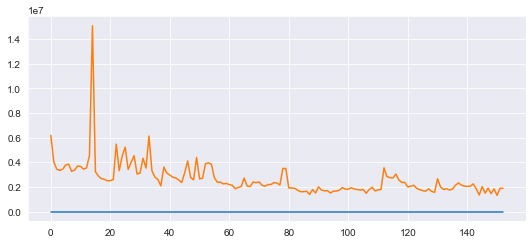

In [27]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.plot(df[['episode_num_overall','us_viewers']])